# INTRODUCCIÓN A PCA

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica estadística de reducción de dimensionalidad que permite simplificar conjuntos de datos complejos con múltiples variables, manteniendo la mayor parte de la información original. Esto se logra transformando las variables originales en un conjunto de nuevas variables llamadas componentes principales, que son combinaciones lineales de las primeras.



Términos Clave
- *Componente Principal (CP)*: Es una combinación lineal de las variables originales que captura la mayor variabilidad posible de los datos.

- *Cargas*: Son los pesos que transforman las variables originales en componentes principales.

- *Screeplot*: Es un gráfico que muestra las varianzas de los componentes principales, lo que permite identificar cuántos de estos componentes son necesarios para explicar la mayor parte de la variabilidad de los datos.

Funcionamiento del PCA

El PCA transforma un conjunto de datos con múltiples variables en un nuevo conjunto de variables (componentes principales), ordenadas según la cantidad de varianza que explican. Este proceso se realiza a través de los siguientes pasos:

- Normalización: Ajustar las variables para que tengan una media de cero y una desviación estándar de uno. Esto asegura que todas las variables contribuyan equitativamente al análisis.

- Cálculo de la Matriz de Covarianza: Identificar cómo varían las variables juntas.

- Valores y Vectores Propios: Calcular los valores propios y los vectores propios de la matriz de covarianza. Los valores propios indican la cantidad de varianza que cada componente principal explica.

- Selección de Componentes Principales: Elegir los componentes que explican la mayor parte de la variabilidad total.
Transformación de Datos: Proyectar los datos originales sobre los componentes seleccionados, reduciendo así la dimensionalidad del conjunto de datos.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = {"ingreso" : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         "horas_trabajadas" : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}
df=pd.DataFrame(datos)

Text(0, 0.5, 'Horas trabajadas')

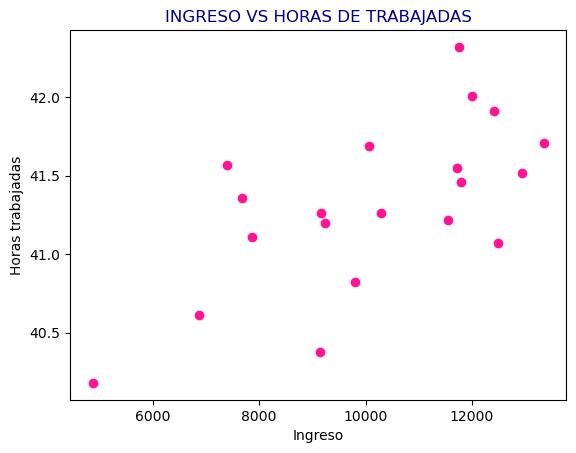

In [4]:
plt.scatter(df['ingreso'], df['horas_trabajadas'], color='deeppink')
plt.title('INGRESO VS HORAS DE TRABAJADAS', color='navy')
plt.xlabel('Ingreso')
plt.ylabel('Horas trabajadas')

In [5]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=['ingreso', 'horas_trabajadas' ])

In [6]:
# CALCULAR LA MATRIZ DE COVARIANZA DE LOS DATOS
df.cov()

,ingreso,horas_trabajadas
ingreso,1.052632,0.682360
horas_trabajadas,0.682360,1.052632


In [7]:
from numpy.linalg import eig

In [8]:
valores, vectores= eig(df.cov())

In [9]:
valores

array([0.37027172, 1.73499143])

In [10]:
vectores

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [11]:
cp1=vectores[:,0]
cp2=vectores[:,1]

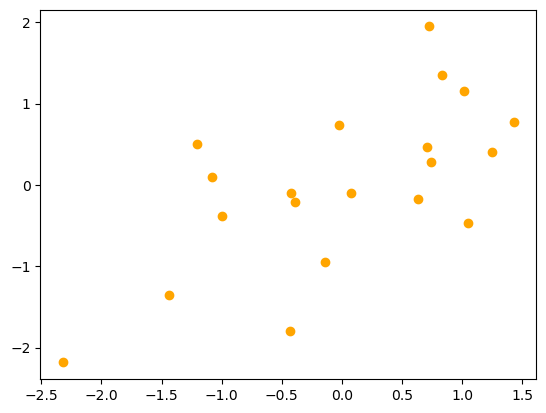

In [44]:
plt.scatter(df['ingreso'],df['horas_trabajadas'],color='orange')


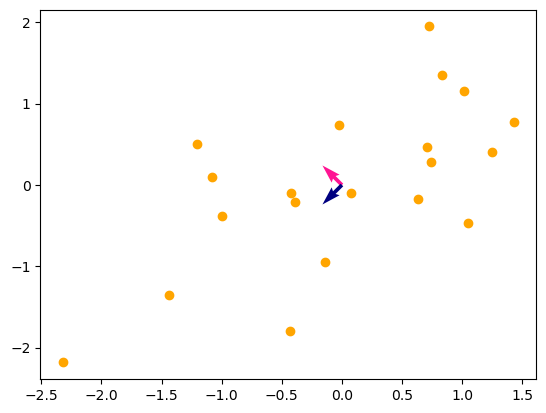

In [47]:
plt.scatter (df['ingreso'],df[ 'horas_trabajadas'],color='orange')
plt.quiver(0,0, cp1[0]/abs(cp1[0] )*valores [0], cp1[1]/abs(cp1[1])*valores [0],color='deeppink') 
plt.quiver(0,0, cp2[0]/abs(cp2[0])*valores [1], cp2[1]/abs(cp2[1])*valores [1], color='navy') 
plt.show()

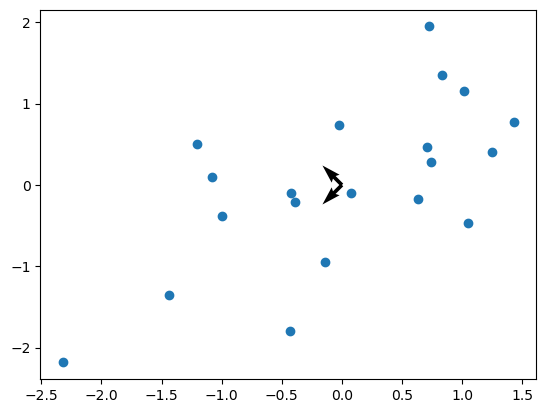

In [14]:
plt.scatter (df['ingreso'],df[ 'horas_trabajadas'])
plt.quiver(0,0, cp1[0]/abs(cp1[0] )*valores [0], cp1[1]/abs(cp1[1])*valores [0]) 
plt.quiver(0,0, cp2[0]/abs(cp2[0])*valores [1], cp2[1]/abs(cp2[1])*valores [1]) 
plt.show()

# PCA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [16]:
datos = pd. read_csv('advertising.csv')
datos. head()

modelo = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA()), #NUMERO DE COMPONETES
    ('regresion', LinearRegression())
    ])

X = datos [['TV', 'Radio', 'Newspaper']]
y = datos['Sales']
modelo. fit(X, y)
pca = modelo.named_steps['pca']
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267],
       [-0.0037659 , -0.70680537,  0.70739804]])

In [17]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)

In [18]:
explained_variance
# el primer compoente tiene el valor mas alto, se tiene 3 componentes porque se tiene 3 variables

,0
0,0.456951
1,0.327752
2,0.215297


In [19]:
lr=modelo.named_steps['regresion']

In [20]:
lr.coef_

array([ 2.06992121,  4.32260897, -1.13244033])

In [21]:
lr.intercept_

15.130500000000001

## 2 COMPONENTES

In [22]:
datos = pd. read_csv('advertising.csv')
datos. head()

modelo = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=2)), #NUMERO DE COMPONETES
    ('regresion', LinearRegression())
    ])

X = datos [['TV', 'Radio']]
y = datos['Sales']
modelo. fit(X, y)
pca = modelo.named_steps['pca']
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [23]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)

In [24]:
lr = modelo.named_steps ['regresion' ]
lr.coef_


array([4.41955176, 2.17488735])

In [25]:
lr.intercept_

15.130500000000001

Mi modelo  es:
$$
Y = 15.13 + 4.41 tv +  2.17 {radio}+ \epsilon
$$

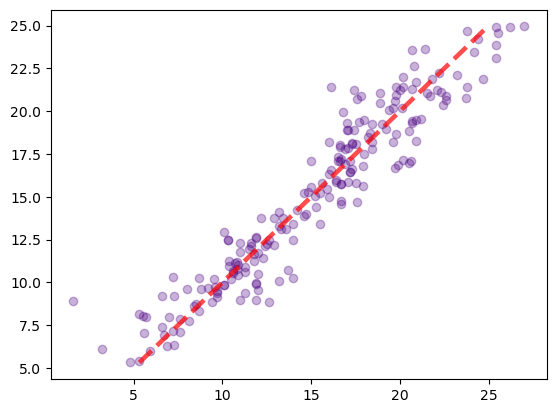

In [43]:
sales_pred = modelo.predict(X)
plt.scatter (datos['Sales'], sales_pred,color='indigo', alpha=0.3)
plt.plot([sales_pred.min(), sales_pred.max()], [sales_pred.min(), sales_pred.max()],'--', color='red', lw=3.3, alpha=0.7)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2= r2_score(datos['Sales'], sales_pred)
r2

0.9025896186081139